In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
from datetime import date
import calendar
import numpy as np
from math import pi
from bokeh.io import show, output_file, output_notebook, reset_output
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.glyphs import Line
from bokeh.transform import cumsum
from bokeh.core.properties import value
from bokeh.palettes import Category20
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

In [2]:
# numeros totales

#palabras promedio por mensaje por usuario
# palabras mas comunes del grupo por año
# palabras mas comunes por usuario




### Import de csv from whatsapp - data formatting

In [ ]:
#read del csv exportado del whatsapp group deseado
#contiene un string por mensaje enviado con información de fecha, usuario y texto

with open('whatsap-group-chat.txt', 'r', encoding="utf8") as myfile:
  data = myfile.read()
sentences = data.split('\n')  
len(sentences)

In [94]:
# producimos y guardamos el DataFrame.
# columnas [user, date, text]

df = pd.DataFrame()
for i in range(1,len(sentences)-1):
    date=None
    usertext=None
    user=None
    text=None
    try:
        date = sentences[i].split('-',1)[0].strip()
        usertext = sentences[i].split('-')[1].strip()
        user = usertext.split(':',1)[0].strip()
        text = usertext.split(':',1)[1].strip()
    except IndexError: 
        pass
    
    
    
    serie = pd.Series([user, date, text], index=['user', 'date', 'text'])
    df = df.append(serie, ignore_index=True)
export_csv = df.to_csv (r'chats-data')


In [2]:
df = pd.read_csv('chats-data') 

In [3]:
#drop de registros con datos nulos

print(df.shape,' tamaño antes de dropear')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear')

(133500, 4)  tamaño antes de dropear
(126147, 4)  tamaño despues de dropear


In [4]:
#convierte la columna date a formato DateTime
df.date = pd.to_datetime(df.date,format='%d/%m/%y %H:%M', errors='coerce')

#crea nuevas columnas en base a datos de fecha

df['week'] = df.date.dt.week
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['weekdaynr'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['date3'] = df.date.dt.date
df['date4'] = df.date.dt.strftime('%m-%Y')
df['weekdaynr'] = df.date.dt.weekday
    
    
    
#dropeamos registros incompletos posterior a la conversión datetime

print(df.shape,' tamaño antes de dropear excepciones coerce / NaT values')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear expepciones coerce / NaT values')
df.sample(3)


(126147, 11)  tamaño antes de dropear excepciones coerce / NaT values
(126143, 11)  tamaño despues de dropear expepciones coerce / NaT values


,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,date4
77692,77692,2018-05-26 17:31:00,ta pagado ese goalkipe,Ilso,21.0,2018.0,5.0,5.0,17.0,2018-05-26,05-2018
29333,29333,2017-01-25 08:51:00,q cosa,Shafal,4.0,2017.0,1.0,2.0,8.0,2017-01-25,01-2017
17991,17991,2016-10-04 23:26:00,El garca real,Il So,40.0,2016.0,10.0,1.0,23.0,2016-10-04,10-2016


In [68]:
df['weekdaynr'] = df.date.dt.weekday

#creamos la columna weekday acorde al dia de la semana

weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
df['weekday'] = df['weekdaynr'].apply(lambda x: weekDays[x])


### DataFrame - sample

In [70]:
df.sample(5)

,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,date4,weekday
64592,64592,2018-01-11 12:28:00,Che estuve hablando con unos franchutes recién...,Fede Sharley,2.0,2018.0,1.0,3,12.0,2018-01-11,01-2018,Jueves
71347,71347,2018-03-29 13:09:00,Que preguntón,Sebi Cell,13.0,2018.0,3.0,3,13.0,2018-03-29,03-2018,Jueves
78414,78414,2018-06-06 13:00:00,#tutifrutistyle,Joaquin,23.0,2018.0,6.0,2,13.0,2018-06-06,06-2018,Miercoles
120397,120397,2019-08-11 11:27:00,Anda a la embajada riti,dona Cel,32.0,2019.0,8.0,6,11.0,2019-08-11,08-2019,Domingo
39277,39277,2017-04-26 22:00:00,<Multimedia omitido>,Ilso,17.0,2017.0,4.0,2,22.0,2017-04-26,04-2017,Miercoles


# --- Data Analytics  ---

### lineplot - mensajes por día 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Cantidad de mensajes totales del grupo estudiados: 126143
Cantidad de mensajes promedio por dia: 95.99923896499239
top cinco dias mas activos date3
2018-11-24    1189
2018-04-29     536
2018-02-17     510
2018-10-31     509
2016-04-19     484
Name: date, dtype: int64


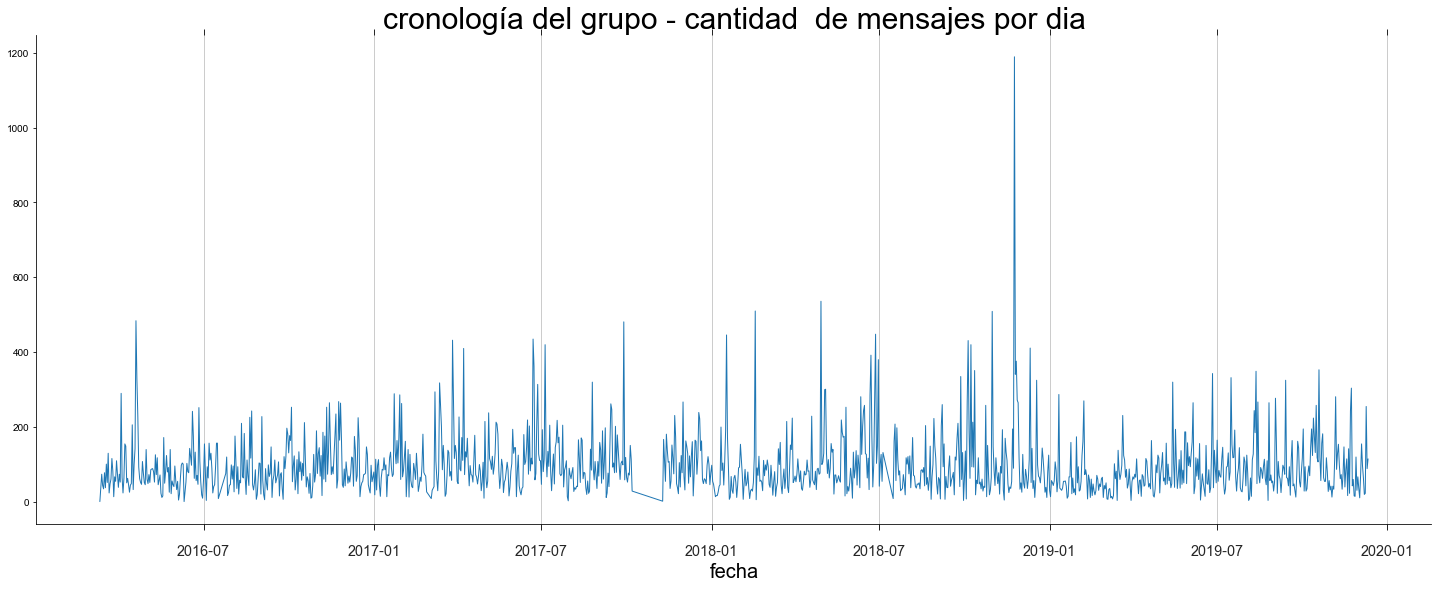

In [6]:
# agrupamos datos por día en un dataframe y producimos un lineplot

df_graph1 = df.groupby('date3').count()

a4_dims = (25, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(style="white")

plt.xlabel('fecha', fontsize=20)
x = df_graph1.index
y = df_graph1.text

ax.tick_params(axis='x',pad=15,labelsize='large', reset=True, gridOn=True ,width=1)
dates = df['date4']

data = df_graph1.text
datamean = data.rolling(5).mean()
sns.despine()
plt.title('cronología del grupo - cantidad  de mensajes por dia', fontsize=30)

sns.lineplot(data=[data], palette="tab10", linewidth=1, legend=False)
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print('Cantidad de mensajes promedio por dia:',df_graph1.date.mean())
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0:5])



In [7]:
#sample del día con mayor actividad del grupo

top_chat_day = df_graph1.date.sort_values(ascending=False).index[0]

print('15 mensajes random del dia mas activo del grupo:',top_chat_day)
df.loc[df['date3'] == top_chat_day].text.sample(15)

15 mensajes random del dia mas activo del grupo: 2018-11-24


97361    "boca los partidos los gana o los pierde en la...
97014                                                Trump
97053                            Dije lo mismo hace 3 años
97415                                              en otra
97746                           La foto del club de amigas
97838                                                   Ah
97417                                         sacá tus own
97715                                                  💙💛💙
96671                                    No me queda claro
97232                           Listo men que cosa barbara
97316                                        #volvioelhall
97399                                                error
97002                                        Da el ejemplo
97093                        tevez anda a aplaudir a macri
97418                                        own = propias
Name: text, dtype: object


### lineplot - comportamiento por horas por año

tomando el comportamiento del último año
hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje -- 12.0 hs
hora del día con menor actividad para decir algo y pasar desapercibido -- 5.0 hs


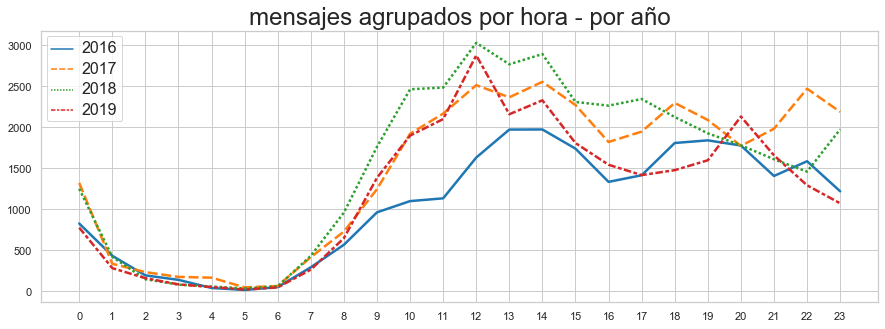

In [65]:
#producimos el grupo de datos agrupados por hora del dia por año para estudiar el comportamiento 
#por hora del grupo

years_lists = df.year.unique()
df_graph2 = pd.DataFrame()

for i in years_lists:
    serie_graph2 = df.loc[df['year'] == i].groupby('hour').count().text.transpose()#.drop(index=i)
    df_graph2 = df_graph2.append(serie_graph2, ignore_index=True)
    
df_graph2.index = years_lists
df_graph2.index = df_graph2.index.astype('int') 



a4_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

plt.title('mensajes agrupados por hora - por año', fontsize=24)
sns.set()


sns.set(style="whitegrid")
data = df_graph2.transpose()
sns.lineplot(data=data, palette="tab10", linewidth=2.5, legend="full")
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text

ax.set_xticks(sorted(df.hour.unique()))

ultimo_año_msg_x_hora = data[data.columns[-1]]
print('tomando el comportamiento del último año')
print('hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje --',ultimo_año_msg_x_hora.idxmax(),'hs') 
print('hora del día con menor actividad para decir algo y pasar desapercibido --',ultimo_año_msg_x_hora.idxmin(),'hs')

In [9]:
#agrupamos datos para estudiar gráfico de actividad por usuario por año-

df_graph3 = df[['year','user','text']].groupby(['year','user']).count()
df_graph3 = df_graph3.sort_values(by=['year','text'], ascending=[False,False])
df_grpah_unstacked = df_graph3.unstack().transpose()
df_grpah_unstacked.index = [i[1] for i in df_grpah_unstacked.index]
df_grpah_unstacked = df_grpah_unstacked.fillna(0)

dict1 = {'years' : df_grpah_unstacked.columns.values.tolist()}
indexlist = list( map(str, df_grpah_unstacked.index))
dict2 = dict(zip(indexlist,df_grpah_unstacked.values.tolist()))
dict1.update(dict2)


a = Category20[20]
b = Category20[20]

colorrr = a + b
users = [df_grpah_unstacked.index.values]

### stacked graph - actividad por usuario por año

In [73]:
reset_output()
output_file("msg_user_year_stackedgraph.html")


years = [df_grpah_unstacked.columns.values]
users = [df_grpah_unstacked.index.values]
colors = colorrr[0:len(df_grpah_unstacked.index)]

data = dict1


users = list( map(str, df_grpah_unstacked.index))

p = figure(plot_height=500,plot_width=800, title="Mensajes por año",
           toolbar_location="right", tools="wheel_zoom,pan,hover,box_select,reset,save", tooltips="$name @$name")#, x_range=years)

p.vbar_stack(users, x='years', width=0.6, source=data, color=colors)# legend=value(users))



p.title.text_font_size = '15pt'
p.y_range.start = 0
p.x_range.range_padding = 0.5
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)


### mensajes multimedia

In [11]:
multimedia_msgs = df.loc[df['text'] == '<Multimedia omitido>'].groupby('user').count().sort_values('date', ascending=[False])
multimedia_msgs = multimedia_msgs.text

print('los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria')
multimedia_msgs[0:3]


los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria


user
Fede Sharley    3823
Pon Cl          1402
Shafal          1321
Name: text, dtype: int64

### Pie chart - participación por usuario total

In [30]:
reset_output()
output_file("msg_user_piegraph.html")

colors = colorrr[0:len(multimedia_msgs.index)]

data = pd.Series(multimedia_msgs).reset_index(name='value').rename(columns={'index':'usuario'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colors
data = data.sort_values(by=['value'], ascending=[False])
p = figure(toolbar_location="right", plot_height=350, title="Mensajes multimedia enviados", 
           tools="hover,reset,save", tooltips="@user: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', source=data )
p.title.text_font_size = '12pt'
p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

### repasamos los analytics en strings que encontramos previamente

In [29]:
#agrupamos todos los analytics generados en formato string
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print()
print('Cantidad de mensajes promedio por dia:',df_graph1.date.mean())
print()
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0:5])
print()
print('15 mensajes random del dia mas activo del grupo:',top_chat_day)
df.loc[df['date3'] == top_chat_day].text.sample(15)
print()
print('los tres miembros del grupo que mas mensajes multimedia envian al grupo')
print()
print(multimedia_msgs[0:3])



Cantidad de mensajes totales del grupo estudiados: 126143

Cantidad de mensajes promedio por dia: 95.99923896499239

top cinco dias mas activos date3
2018-11-24    1189
2018-04-29     536
2018-02-17     510
2018-10-31     509
2016-04-19     484
Name: date, dtype: int64

15 mensajes random del dia mas activo del grupo: 2018-11-24

los tres miembros del grupo que mas mensajes multimedia envian al grupo

user
Fede Sharley    3823
Pon Cl          1402
Shafal          1321
Name: text, dtype: int64
